# Homework 3

Before you run your homework run the code below:

In [1]:
import os
import sys
import hashlib
import pandas as pd
import numpy as np
from urllib.request import urlopen

assert os.path.exists('../homeworks/HW4.ipynb')

info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/hw-4-'+name,'w') as f:
    f.write(info)

In [2]:
with open('../other/hw-4-'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/hw-4-'+name)

## Task

Apply all of the supervised and unsupervised classification and clustering algorithms we learned so far for the [sonar dataset from UCI](http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)).

The code for downloading the data is below. Don't load the data again and again in each subtask, refer the data as `SONAR` after you run the cell below.

In [3]:
with urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data") as fil:
    SONAR = pd.read_csv(fil, delimiter=',', header=None)

Split the tasks into subtasks and into separate cells.  Also before your analysis for each subtask, write a short paragraph before explaining which algorithm you are going to use. Each subtask should look like this

# Subtask 1: KMeans

- First cell importing libraries- 
- Splitting the data and setting to train test split
- Creating and using Kmeans algorithm with 2 cluster
- fitting the data and predicting the data 
- normally not tested but i have a dataset with label so i test it

In [4]:
#importing libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#dataset assigning split to x and y
x=SONAR.iloc[:,0:60]
y=SONAR.iloc[:,60]
#labels are converting to numerical caterogical
labels={"M":1,"R":0}
y=y.map(lambda x:labels[x])

#normalizing data
scaler = StandardScaler()
scaler.fit(x)
x =  scaler.transform(x)
#creating train, test set 
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.33)


In [5]:
#fitting and prediction
kmeans=KMeans(n_clusters=2)
kmeans.fit(Xtrain)
pred=kmeans.predict(Xtest)

print(confusion_matrix(Ytest,pred))
accuracy_score(Ytest,pred)

[[ 5 22]
 [ 8 34]]


0.5652173913043478

-It is not valid algorithm for Sonar dataset.It is cluster algorithm.

# Subtask 2: KNN

-importing Knn classifier algorithm and create knn fuction 
-fit the train set where I created before then using the Xtest for prediction
-Finally printing confussion matrix and accuracy 

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
knn.fit(Xtrain,Ytrain)
pred_knn=knn.predict(Xtest)

print(confusion_matrix(Ytest,pred_knn))
print(accuracy_score(Ytest,pred_knn))

[[22  5]
 [ 2 40]]
0.8985507246376812


-Sonar dataset is very appropriate for knn algorithm.We can see that it is not bad accuracy. 

# Subtask 3:Hierarchical cluster


-It is an unsupervised algorithm.I used only X independet values on hieararchical clustering
-For Testing Y must be converted numerical categorical
-at the end of code I tested with Y dependent values 

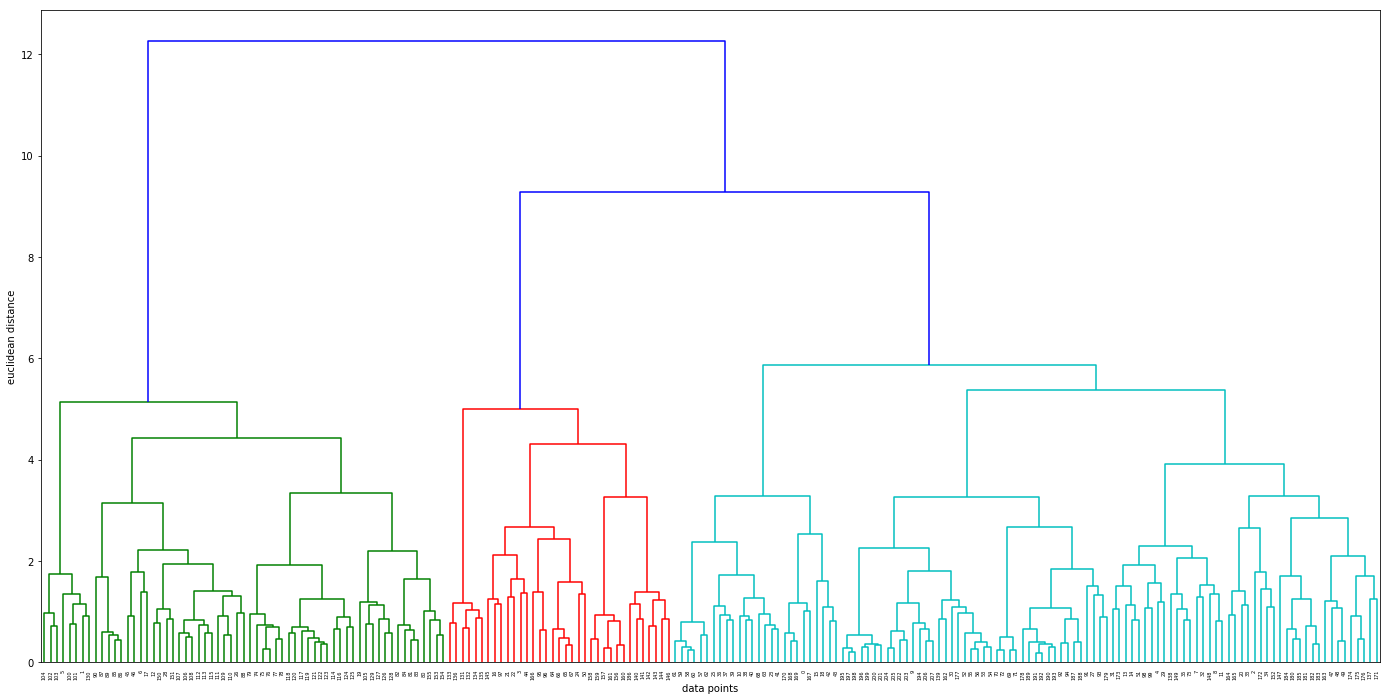

[[70 27]
 [75 36]]
0.5096153846153846


In [7]:
#importing liblaries
from scipy.cluster.hierarchy import linkage, dendrogram ,cut_tree
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt

#create hierarchical function 
hieararchical_cluster=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
#dataset preparing
x=SONAR.iloc[:,0:60]
y=SONAR.iloc[:,60]

#labels are converting to numerical caterogical
labels={"M":1,"R":0}
y=y.map(lambda x:labels[x])

#fit and prediction
predict=hieararchical_cluster.fit_predict(SONAR.iloc[:,0:60])
#create merge method and plotting dendogram
merg = linkage(x,method="ward")
#cutting tree
cut_tree(n_clusters=2,Z=merg)
plt.figure(figsize=[24,12])
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

#Score of hieararchical clustering
print(confusion_matrix(y,predict))
print(accuracy_score(y,predict))


-Result is bad,It did't worked because of We tried to aprroaching to Supervised data with an clustering algorithm.


# Subtask 4: Naive Bayes Classifier

-Naive bayes Classifier is appropriate algorithm for this dataset.

In [12]:
from sklearn.naive_bayes import GaussianNB
#creating naive bayes algo
nb = GaussianNB()
#fitting 
nb.fit(Xtrain,Ytrain)
#accuracy
print("Accuracy of Naive bayes algorithm: ",nb.score(Xtest,Ytest))

Accuracy of Naive bayes algorithm:  0.6231884057971014


-As a result it is  algorithm for th

# Subtask 4: Logistic Regression

-It is an classification algorithm it is very obvious that it will more accurate than other unsupervised algorithm

In [ ]:
#libraries
from sklearn.linear_model import LogisticRegression
#creating logistic regression function
multiple_logreg=LogisticRegression()

#fitting and predicting
multiple_logreg.fit(Xtrain,Ytrain)
predict=multiple_logreg.predict(Xtest)
#accuracy
print(confusion_matrix(predict,Ytest))
print(accuracy_score(predict,Ytest))


-Consequently it is good result.

# Subtask 6: Linear Regression

Lİnear regression can not be used on Sonar dataset that has not continuos dependent variable.

---------------